In [2]:
import os, sys
import pandas as pd

sys.path.append("../model_explorer/third_party/yolop_det_seg")

from model_explorer.result_handling.collect_results import collect_results

In [9]:
WORKLOAD = 'unet'

# results = collect_results('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/expl_quantization_problem_yolop_bdd100k_2023-03-15_15-35.pkl')
# results = collect_results('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/expl_energy_aware_quant_problem_yolop_bdd100k_2023-03-30_13-53.pkl')
if WORKLOAD == 'unet':
    results = collect_results('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/expl_energy_aware_quant_problem_unet_david_2023-03-30_20-29.pkl')
if WORKLOAD == 'yolop':
    results = collect_results('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/energy_aware_yolop/expl_energy_aware_quant_problem_yolop_bdd100k_2023-03-30_13-53.pkl')

dfin = results.to_dataframe()

dfin.head()


,generation,individual,accuracies,mutation_eta,mutation_prob,crossover_eta,crossover_prob,selection_press,F_0,parameters
0,0,0,[[0.9617581367492676]],10,1.0,5,0.9,2,46575.8224,"[7, 11, 13, 8, 12, 5, 12, 6, 8, 7, 5, 13, 8, 9..."
1,0,1,[[0.96549391746521]],10,1.0,5,0.9,2,46783.7384,"[12, 11, 12, 8, 10, 6, 7, 6, 8, 6, 8, 14, 7, 1..."
2,0,2,[[0.9638427495956421]],10,1.0,5,0.9,2,50328.5616,"[9, 13, 8, 6, 8, 13, 13, 12, 13, 6, 5, 6, 7, 6..."
3,0,3,[[0.9634127616882324]],10,1.0,5,0.9,2,53169.4640,"[13, 13, 11, 7, 7, 13, 9, 12, 10, 11, 9, 12, 1..."
4,0,4,[[0.9648538827896118]],10,1.0,5,0.9,2,53224.0680,"[12, 11, 7, 7, 10, 7, 12, 8, 12, 14, 7, 5, 13,..."


In [10]:
def prepare(df):
    if WORKLOAD == 'yolop':
        df[['acc_ll','acc_da','acc_det']] = pd.DataFrame(df.accuracies.tolist(), index=df.index)
        df = df[df['acc_ll'] > results.accuracy_limit[0]]
        df = df[df['acc_da'] > results.accuracy_limit[1]]
        df = df[df['acc_det'] > results.accuracy_limit[2]]
    if WORKLOAD == 'unet':
        df[['acc_miou']] = pd.DataFrame(df.accuracies.tolist(), index=df.index)
        df = df[df['acc_miou'] > results.accuracy_limit]
    return df

df_prep = prepare(dfin)
print(df_prep.shape)
df_prep.head()

(164, 11)


,generation,individual,accuracies,mutation_eta,mutation_prob,crossover_eta,crossover_prob,selection_press,F_0,parameters,acc_miou
0,0,0,[[0.9617581367492676]],10,1.0,5,0.9,2,46575.8224,"[7, 11, 13, 8, 12, 5, 12, 6, 8, 7, 5, 13, 8, 9...",[0.9617581367492676]
1,0,1,[[0.96549391746521]],10,1.0,5,0.9,2,46783.7384,"[12, 11, 12, 8, 10, 6, 7, 6, 8, 6, 8, 14, 7, 1...",[0.96549391746521]
2,0,2,[[0.9638427495956421]],10,1.0,5,0.9,2,50328.5616,"[9, 13, 8, 6, 8, 13, 13, 12, 13, 6, 5, 6, 7, 6...",[0.9638427495956421]
3,0,3,[[0.9634127616882324]],10,1.0,5,0.9,2,53169.4640,"[13, 13, 11, 7, 7, 13, 9, 12, 10, 11, 9, 12, 1...",[0.9634127616882324]
4,0,4,[[0.9648538827896118]],10,1.0,5,0.9,2,53224.0680,"[12, 11, 7, 7, 10, 7, 12, 8, 12, 14, 7, 5, 13,...",[0.9648538827896118]


<AxesSubplot: xlabel='Accuracy', ylabel='Energy in uJ'>

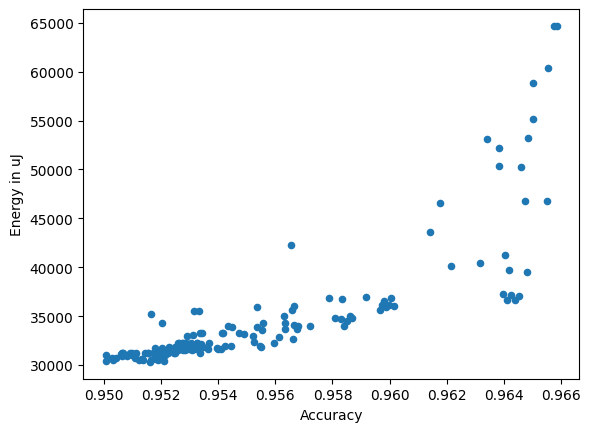

In [12]:
df_prep.plot(kind='scatter', x='acc_miou', y='F_0', xlabel='Accuracy', ylabel='Energy in uJ')

In [17]:
for i, row in df_prep.iterrows():
    print(f"{i},0,nondom,{row['acc_miou'][0]*100}, {row['F_0']/1000}")

0,0,nondom,96.17581367492676, 46.5758224
1,0,nondom,96.549391746521, 46.783738400000004
2,0,nondom,96.38427495956421, 50.3285616
3,0,nondom,96.34127616882324, 53.169464
4,0,nondom,96.48538827896118, 53.224068
12,0,nondom,96.47231101989746, 46.8132296
13,0,nondom,96.46133184432983, 50.230552
14,0,nondom,96.50101065635681, 55.1441448
15,0,nondom,96.50237560272217, 58.861232
16,0,nondom,96.552574634552, 60.407968000000004
17,0,nondom,96.57677412033081, 64.678428
18,0,nondom,96.58417701721191, 64.6840072
19,0,nondom,96.45275473594666, 37.0359824
20,0,nondom,96.41705751419067, 39.7333568
21,0,nondom,96.21309041976929, 40.1450728
22,0,nondom,96.31792306900024, 40.4554792
23,0,nondom,95.65359950065613, 42.278392
24,0,nondom,96.38193845748901, 52.20202
25,0,nondom,95.97296118736267, 36.111425600000004
26,0,nondom,95.97952365875244, 36.5966376
27,0,nondom,95.91813683509827, 36.9434352
28,0,nondom,96.3952898979187, 37.253500800000005
29,0,nondom,96.48147821426392, 39.527864
30,0,nondom,96.403151

In [10]:
(i, row) = next(df_prep.iterrows())
for idx, p in enumerate(row['parameters']):
    print(f"({idx},{p})")

(0,8)
(1,9)
(2,10)
(3,9)
(4,13)
(5,13)
(6,8)
(7,14)
(8,6)
(9,5)
(10,5)
(11,9)
(12,4)
(13,13)
(14,12)
(15,4)
(16,6)
(17,7)
(18,5)
(19,12)
(20,7)
(21,13)
(22,10)
(23,13)
(24,12)
(25,13)
(26,9)
(27,9)
(28,12)
(29,7)
(30,9)
(31,10)
(32,4)
(33,10)
(34,8)
(35,12)
(36,7)
(37,13)
(38,10)
(39,6)
(40,12)
(41,10)
(42,5)
(43,8)
(44,11)
(45,13)
(46,4)
(47,14)
(48,8)
(49,14)
(50,10)
(51,12)
(52,10)
(53,10)
(54,7)
(55,10)
(56,12)
(57,13)
(58,12)
(59,11)
(60,13)
(61,7)
(62,11)
(63,9)
(64,8)
(65,8)
(66,8)
(67,7)
(68,10)
(69,8)
(70,14)
(71,11)
(72,6)
(73,8)
(74,7)
(75,12)
(76,13)
(77,13)
(78,11)
(79,7)
(80,7)
(81,13)
(82,9)
(83,12)
(84,10)
(85,11)
(86,9)
(87,12)
(88,10)
(89,9)
(90,7)
(91,5)
(92,8)
(93,5)
(94,14)
(95,6)
(96,12)
(97,13)
(98,11)
(99,10)
(100,6)
(101,9)
(102,7)
(103,6)
(104,10)
(105,7)
(106,13)
(107,13)
(108,7)
(109,5)
(110,6)
(111,9)
(112,11)
(113,6)
(114,6)
(115,13)
(116,8)
(117,10)
(118,6)
(119,5)
(120,9)
(121,9)
(122,6)
(123,10)
(124,9)
(125,11)
(126,5)
(127,12)
(128,6)
(129,9)
(130,12)

### Generate Bit plot

In [12]:
import numpy as np

df_constrained = df_prep[df_prep['F_0'] < 20000]
bit_mat = None

for i, row in df_constrained.iterrows():
    params = np.array(row['parameters'])
    if bit_mat is None:
        bit_mat = params
    else:
        bit_mat = np.vstack((bit_mat, params))

print(bit_mat.shape)

(84, 204)


In [13]:
bits = np.mean(bit_mat, axis=0)

<BarContainer object of 102 artists>

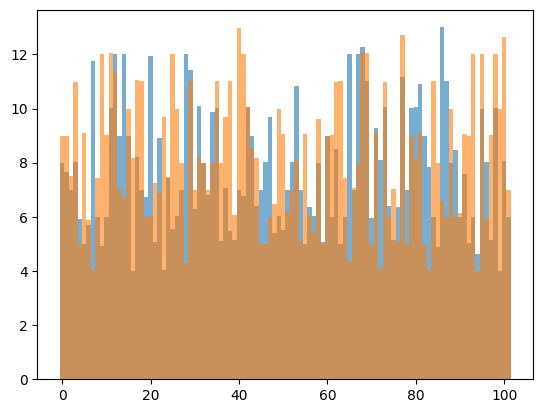

In [14]:
import matplotlib.pyplot as plt

input_bits = bits[0::2]
weight_bits = bits[1::2]

xi = list(range(input_bits.shape[0]))
xw = list(range(weight_bits.shape[0]))
plt.bar(xi, input_bits, width=1, alpha=0.6)
plt.bar(xw, weight_bits, width=1, alpha=0.6)

In [9]:
print("Inputs:", np.mean(input_bits))
print("Weights:", np.mean(weight_bits))

Inputs: 8.311887254901961
Weights: 9.065686274509805


Combination with the least bits

<BarContainer object of 102 artists>

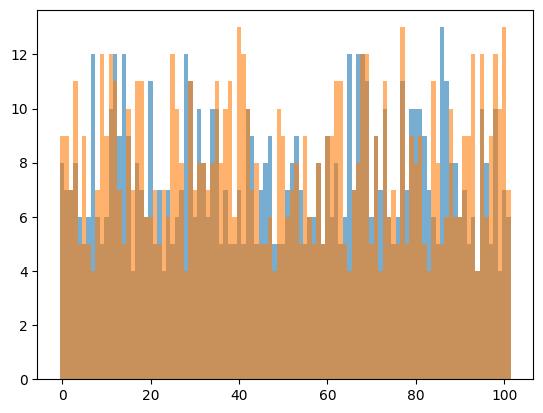

In [15]:
series_best = df_prep.sort_values(by='F_0', ascending=True).iloc[0]
bits = series_best['parameters']

input_bits = bits[0::2]
weight_bits = bits[1::2]

xi = list(range(len(input_bits)))
xw = list(range(len(weight_bits)))
plt.bar(xi, input_bits, width=1, alpha=0.6)
plt.bar(xw, weight_bits, width=1, alpha=0.6)


Export for TikZ plot

In [16]:
for i, b in enumerate(input_bits):
    print(f"({i}, {b:.4f})")
print("")
for i, w in enumerate(weight_bits):
    print(f"({i}, {-w:.4f})")

(0, 8.0000)
(1, 7.0000)
(2, 7.0000)
(3, 8.0000)
(4, 6.0000)
(5, 5.0000)
(6, 6.0000)
(7, 12.0000)
(8, 6.0000)
(9, 5.0000)
(10, 6.0000)
(11, 10.0000)
(12, 12.0000)
(13, 9.0000)
(14, 12.0000)
(15, 9.0000)
(16, 4.0000)
(17, 8.0000)
(18, 7.0000)
(19, 6.0000)
(20, 11.0000)
(21, 5.0000)
(22, 7.0000)
(23, 4.0000)
(24, 7.0000)
(25, 5.0000)
(26, 6.0000)
(27, 7.0000)
(28, 12.0000)
(29, 11.0000)
(30, 6.0000)
(31, 10.0000)
(32, 8.0000)
(33, 6.0000)
(34, 10.0000)
(35, 10.0000)
(36, 5.0000)
(37, 7.0000)
(38, 5.0000)
(39, 5.0000)
(40, 7.0000)
(41, 5.0000)
(42, 10.0000)
(43, 9.0000)
(44, 5.0000)
(45, 7.0000)
(46, 8.0000)
(47, 9.0000)
(48, 5.0000)
(49, 5.0000)
(50, 5.0000)
(51, 7.0000)
(52, 8.0000)
(53, 9.0000)
(54, 7.0000)
(55, 5.0000)
(56, 6.0000)
(57, 6.0000)
(58, 8.0000)
(59, 5.0000)
(60, 9.0000)
(61, 6.0000)
(62, 8.0000)
(63, 5.0000)
(64, 6.0000)
(65, 12.0000)
(66, 7.0000)
(67, 12.0000)
(68, 12.0000)
(69, 11.0000)
(70, 6.0000)
(71, 9.0000)
(72, 7.0000)
(73, 10.0000)
(74, 6.0000)
(75, 5.0000)
(76, 6